In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
#Loading Data
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")[0]
df.head()

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned


## Wrangling

In [121]:
# Fixing the shape
df = pd.DataFrame(np.array(df).reshape(180, 1))
df.head()

,0
0,M1ANot assigned
1,M2ANot assigned
2,M3ANorth York(Parkwoods)
3,M4ANorth York(Victoria Village)
4,M5ADowntown Toronto(Regent Park / Harbourfront)


In [122]:
df['PostalCode'] = df.applymap(lambda x: x[:3])

In [123]:
df['Borough'] = df[[0]].applymap(lambda x: x[3:].split('(')[0])

In [124]:
def wrangle(x):
    if len(x.split('('))==1:
        return None
    else: 
        return x.split('(')[1][:-1]

In [125]:
df['Neighborhood'] = df[[0]].applymap(wrangle)
df.drop(0, axis=1, inplace=True)

In [126]:
df.dropna(inplace=True)

In [127]:
df[['Neighborhood']] = df[['Neighborhood']].applymap(lambda x: x.replace(' /', ','))

In [128]:
df.reset_index(inplace=True, drop=True)
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


## Loading Latitude and Longitude

In [129]:
cor = pd.read_csv('Geospatial_Coordinates.csv')
cor.rename(columns={'Postal Code':'PostalCode'}, inplace=True)

In [152]:
data = pd.merge(df, cor, on='PostalCode')
data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


## Clustering

In [154]:
from sklearn.cluster import KMeans

score = []
for k in range(2, 30):
    
    model = KMeans(n_clusters=k)
    model.fit(data[['Latitude', 'Longitude']])
    score.append(model.score(data[['Latitude', 'Longitude']]))

<AxesSubplot:>

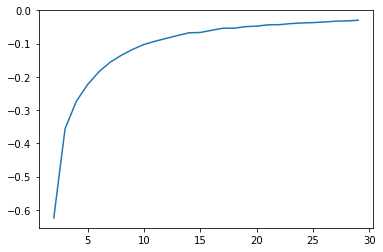

In [156]:
sns.lineplot(x=range(2, 30), y=score)

In [157]:
print('k=10 seems like a good choice')
    
model = KMeans(n_clusters=10)
model.fit(data[['Latitude', 'Longitude']])

k=10 seems like a good choice


KMeans(n_clusters=10)